In [15]:
# Automatically reload our project Python modules when we run the notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data can be gathered from https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [16]:
import pyarrow.parquet as pq
parquet_file = pq.ParquetFile("../data/taxi_ride_data.parquet")

# Print the schema
print(parquet_file.schema)

required group field_id=-1 schema {
  optional int32 field_id=-1 VendorID;
  optional int64 field_id=-1 tpep_pickup_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 tpep_dropoff_datetime (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional int64 field_id=-1 passenger_count;
  optional double field_id=-1 trip_distance;
  optional int64 field_id=-1 RatecodeID;
  optional binary field_id=-1 store_and_fwd_flag (String);
  optional int32 field_id=-1 PULocationID;
  optional int32 field_id=-1 DOLocationID;
  optional int64 field_id=-1 payment_type;
  optional double field_id=-1 fare_amount;
  optional double field_id=-1 extra;
  optional double field_id=-1 mta_tax;
  optional double field_id=-1 tip_amount;
  optional double field_id=-1 tolls_amount;
  optional double field_id=-1 improvement_surcharge;
  op

In [17]:
import pandas as pd


raw_data = pd.read_parquet("../data/taxi_ride_data.parquet")
display(raw_data.head())
raw_data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06,3.475226e+06
mean,1.785428e+00,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.297859e+00,5.855126e+00,2.482535e+00,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01,4.834093e-01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00,7.500000e-01
std,4.263282e-01,NaN,NaN,7.507503e-01,5.646016e+02,1.163277e+01,6.452948e+01,6.940169e+01,7.013334e-01,4.634729e+02,1.861509e+00,1.374623e-01,3.779681e+00,2.002582e+00,2.781938e-01,4.636585e+02,9.039932e-01,4.725090e-01,3.619307e-01


In order to keep things as simple as possible, everything is kept to the pure minimum here. 

For a detailed "play stage" analysis of the NYC Yellow Taxi Trip Data, have a look at https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data and https://www.kaggle.com/elemento/nyc-yellowtriptaxi/notebook

In [18]:
data = pd.DataFrame()

data['ride_dist'] = raw_data['trip_distance']
raw_data['tpep_pickup_datetime'] = pd.to_datetime(raw_data['tpep_pickup_datetime'])
raw_data['tpep_dropoff_datetime'] = pd.to_datetime(raw_data['tpep_dropoff_datetime'])
data['ride_time'] = (raw_data['tpep_dropoff_datetime'] - raw_data['tpep_pickup_datetime']).dt.total_seconds()
data['date'] = raw_data['tpep_pickup_datetime'].dt.date
data['ride_id'] = raw_data.index
data.head()

,ride_dist,ride_time,date,ride_id
0,1.60,501.0,2025-01-01,0
1,0.50,153.0,2025-01-01,1
2,0.60,117.0,2025-01-01,2
3,0.52,334.0,2025-01-01,3
4,0.66,212.0,2025-01-01,4


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cluster_and_label(X, create_and_show_plot=True):
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)

    # Find labels from the clustering
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    #print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    #print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    #print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    #print("Adjusted Rand Index: %0.3f"
    #      % metrics.adjusted_rand_score(labels_true, labels))
    #print("Adjusted Mutual Information: %0.3f"
    #      % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))

    run_metadata = {
        'nClusters': n_clusters_,
        'nNoise': n_noise_,
        'silhouetteCoefficient': metrics.silhouette_score(X, labels),
        'labels': labels,
    }
    if create_and_show_plot == True:
        fig = plt.figure(figsize=(10,10))
        # Black removed and is used for noise instead.
        unique_labels = set(labels)
        colors = [plt.cm.cool(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]
            class_member_mask = (labels== k)
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)
            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], '^', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)
            
        plt.xlabel('Standard Scaled Ride Dist.')
        plt.ylabel('Standard Scaled Ride Time')
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()
    else:
        pass
    return run_metadata

Estimated number of clusters: 1
Estimated number of noise points: 20
Silhouette Coefficient: 0.972


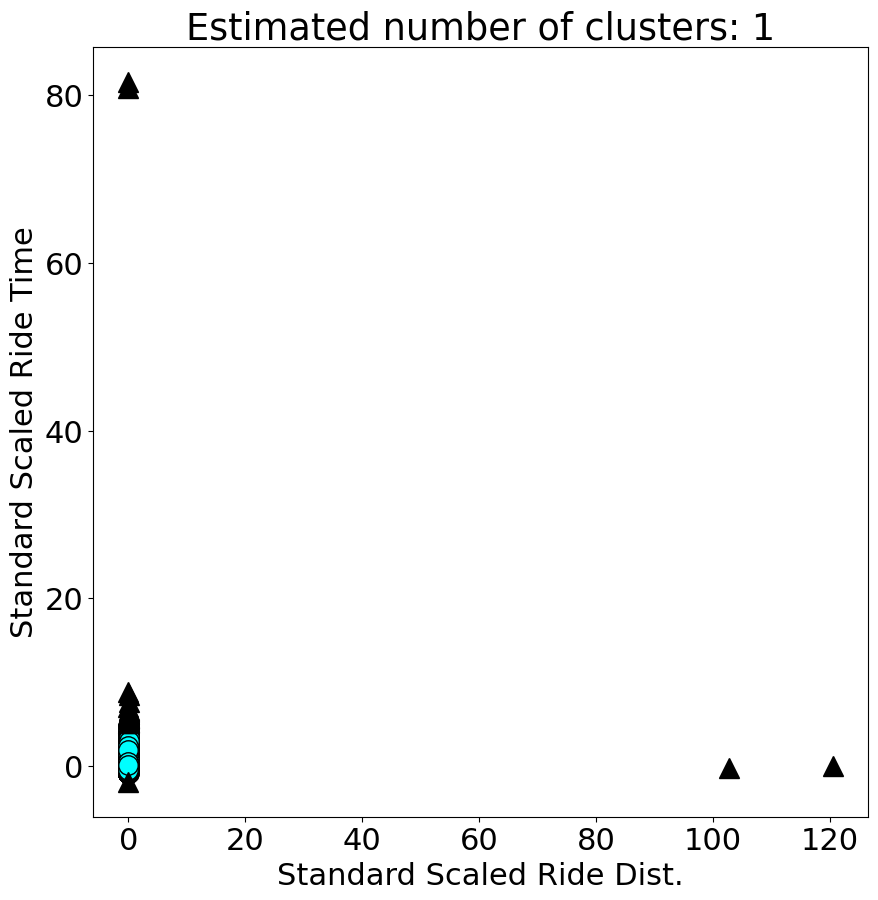

Found 20 outliers


,ride_dist,ride_time,date,ride_id,label
1315880,1.00,-1032.0,2025-01-15,1315880,-1
3093664,53102.26,660.0,2025-01-15,3093664,-1
1266762,12.30,7724.0,2025-01-15,1266762,-1
1302690,1.56,84203.0,2025-01-15,1302690,-1
1275561,19.80,6839.0,2025-01-15,1275561,-1


In [20]:
sampled_data = data[data['date'] == pd.to_datetime('2025-01-15').date()]
sampled_data = sampled_data.sample(frac=0.2, random_state=42)


# Create some nice plots
X = sampled_data[['ride_dist', 'ride_time']]
results = cluster_and_label(X)
sampled_data['label'] = results['labels']
sampled_data.head()
sampled_data.describe()

outliers = sampled_data[sampled_data['label'] == -1]
print('Found %d outliers' % len(outliers))
outliers.head()
